# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Script

In [2]:
# setting path
path = r'C:\Users\faisa\Desktop\Data analysis\Data Immersion\Achievement 6'

In [3]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'combined dataframe 1.1.pkl'))

In [4]:
pd.options.display.max_columns = False

## Cleaning and wrangling

In [5]:
df.head()

,order_id,user_id,status,gender,order_created_at,returned_at,shipped_at,delivered_at,num_of_item,first_name,last_name,age,state,postal_code,city,country,traffic_source,user_created_at,product_id,inventory_item_id,product_created_at,sale_price,cost,category,product_name,brand,department,distribution_center,distribution_center_latitude,distribution_center_logitude,price_category,profit,order_date
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brazil,Organic,2020-10-02 10:03:00+00:00,6998,36,2022-10-22 07:55:58+00:00,15.67,7.44325,Shorts,Grane Supergirl Shorts,Grane,Women,Chicago IL,41.8369,-87.6847,Cheap,8.22675,2022-10
1,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brazil,Organic,2020-10-02 10:03:00+00:00,7173,29,2022-10-20 06:35:35+00:00,24.99,10.47081,Skirts,Woman Within Plus Size Petite flare skirt,Woman Within,Women,New Orleans LA,29.9500,-90.0667,Cheap,14.51919,2022-10
2,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3,Vanessa,Ross,52,Piauí,64120-000,União,Brazil,Organic,2020-10-02 10:03:00+00:00,1488,33,2022-10-24 07:19:09+00:00,24.99,10.89564,Sweaters,LookbookStore Women Coloured Zip Mouth Smile S...,LookbookStore,Women,New Orleans LA,29.9500,-90.0667,Cheap,14.09436,2022-10
3,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1,Melissa,Whitaker,56,Chung-cheong bukdo,360-100,Cheongju City,South Korea,Search,2022-08-16 02:12:00+00:00,14717,275,2023-01-20 00:35:38+00:00,16.99,6.67707,Maternity,Lace Cami Top and Boxer Shorts Lingerie Set,Angelina Hosiery,Women,Houston TX,29.7604,-95.3698,Cheap,10.31293,2023-01
4,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1,Linda,White,40,New York,10474,New York,USA,Search,2020-01-07 09:11:00+00:00,9588,287,2021-12-06 06:35:44+00:00,36.00,22.06800,Sleep & Lounge,Calvin Klein Women's Nocturnal Elegance Camisole,Calvin Klein,Women,Houston TX,29.7604,-95.3698,Cheap,13.93200,2021-12


In [6]:
df1 = df[['cost', 'sale_price']]

In [7]:
df1.isnull().sum()

cost          0
sale_price    0
dtype: int64

C:\Users\faisa\AppData\Local\Temp\ipykernel_26508\3032573712.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sale_price'], bins=25) # Shows extreme values


<Axes: xlabel='sale_price', ylabel='Density'>

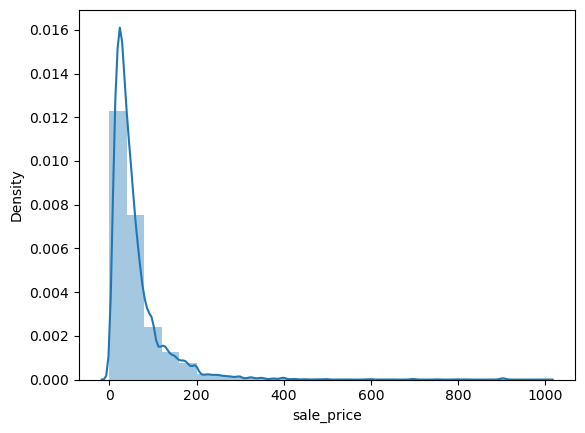

In [8]:
sns.distplot(df['sale_price'], bins=25) # Shows extreme values

C:\Users\faisa\AppData\Local\Temp\ipykernel_26508\729151710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cost'], bins=25) # Shows extreme values


<Axes: xlabel='cost', ylabel='Density'>

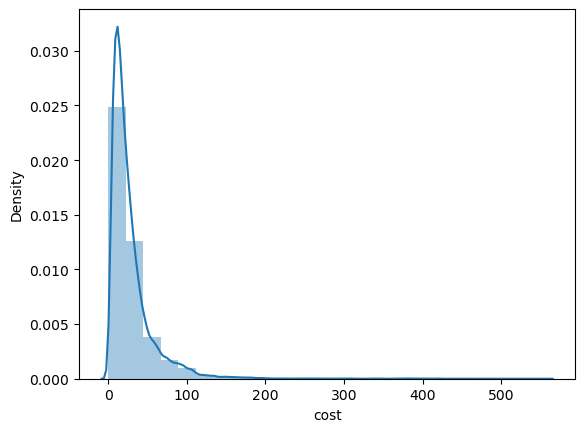

In [9]:
sns.distplot(df['cost'], bins=25) # Shows extreme values

In [10]:
df1['cost'].mean()

28.655281002703063

In [11]:
df1['cost'].median()

19.8290000037523

In [12]:
df1['cost'].max()

557.1510021798313

In [13]:
df1['sale_price'].mean()

59.568543575559886

In [14]:
df1['sale_price'].median()

39.9900016784668

In [15]:
df1['sale_price'].max()

999.0

## Data preparation for data analysis

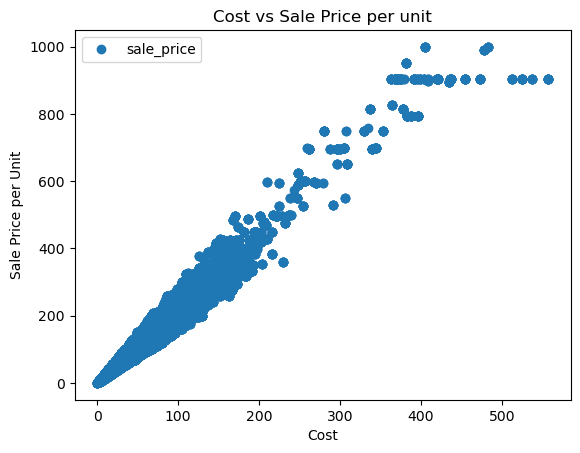

In [8]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df1.plot(x = 'cost', y='sale_price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cost vs Sale Price per unit')  
plt.xlabel('Cost')  
plt.ylabel('Sale Price per Unit')  
plt.show()

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df1['cost'].values.reshape(-1,1)
y = df1['sale_price'].values.reshape(-1,1)

In [10]:
X

array([[  7.44325003],
       [ 10.47080985],
       [ 10.89563987],
       ...,
       [122.10000046],
       [ 11.87500001],
       [ 22.13469975]])

In [11]:
y

array([[ 15.67000008],
       [ 24.98999977],
       [ 24.98999977],
       ...,
       [300.        ],
       [ 25.        ],
       [ 42.97999954]])

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [13]:
# Create a regression object.
regression = LinearRegression()

In [14]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

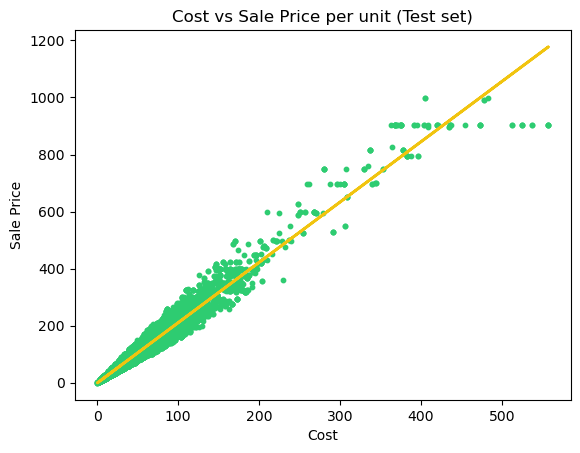

In [18]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='#2ecc71', s = 10)
plot_test.plot(X_test, y_predicted, color='#f1c40f', linewidth =2)
plot_test.title('Cost vs Sale Price per unit (Test set)')
plot_test.xlabel('Cost')
plot_test.ylabel('Sale Price')
plot_test.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression test.png'), dpi=300, bbox_inches='tight')
plot_test.show()

In [19]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.114846]]
Mean squared error:  152.93437087649838
R2 score:  0.9649492252528491


In [21]:
y_predicted

array([[60.42761347],
       [44.34528966],
       [60.20661182],
       ...,
       [22.94226366],
       [11.73620305],
       [14.90178849]])

In [22]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,49.500000,60.427613
1,42.990002,44.345290
2,56.000000,60.206612
3,22.580000,22.233410
4,24.990000,27.780841
5,68.949997,63.137786
6,136.000000,127.543308
7,98.989998,91.300324
8,9.990000,12.266669
9,29.950001,30.204033


In [23]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.114846]]
Mean squared error:  151.12448530603896
R2 score:  0.9662474462400583


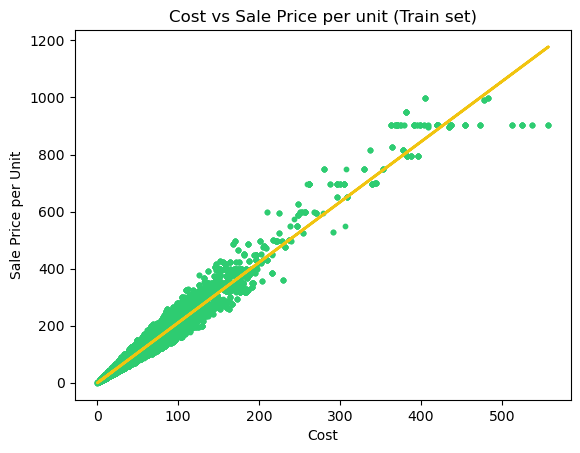

In [46]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='#2ecc71', s = 10)
plot_test.plot(X_train, y_predicted_train, color='#f1c40f', linewidth =2)
plot_test.title('Cost vs Sale Price per unit (Train set)')
plot_test.xlabel('Cost')
plot_test.ylabel('Sale Price per Unit')
plot_test.show()

### OBSERVATION: The line fits the data well as there is a clear positive relation between the price and the cost.
### Although on the higher Cost/Price ranges which could be identified as outliers some values lean more towards the cost.
### R2 being around 96.6% accurate and the predictions being close to the actual data, the model prediction is decent.


### Removing Outliers and redoing the test

In [26]:
# Clean the extreme values from the "cost" and 'Price' variable.

df_test = df1[(df1['cost'] <=200) & (df1['sale_price'] <=400)]

In [27]:
df_test['cost'].max()

197.1059996075928

In [28]:
df_test['sale_price'].max()

400.0

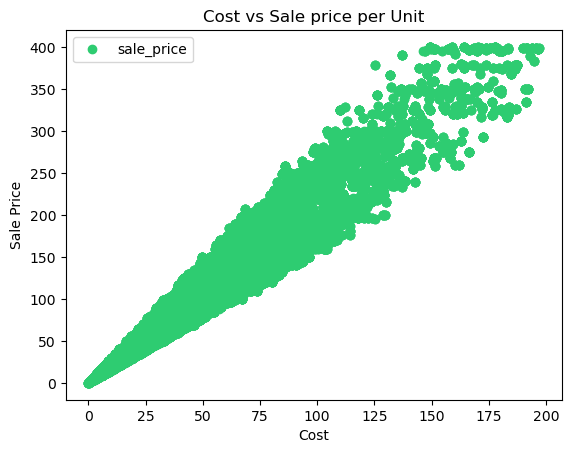

In [36]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'cost', y='sale_price',color='#2ecc71', style='o')  
plt.title('Cost vs Sale price per Unit')  
plt.xlabel('Cost')  
plt.ylabel('Sale Price')  
plt.show()

In [30]:
# Reshape again.

X_2 = df_test['cost'].values.reshape(-1,1)
y_2 = df_test['sale_price'].values.reshape(-1,1)

In [31]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [32]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [33]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [34]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.08145442]]
Mean squared error:  121.74644420698365
R2 score:  0.9570666118082551


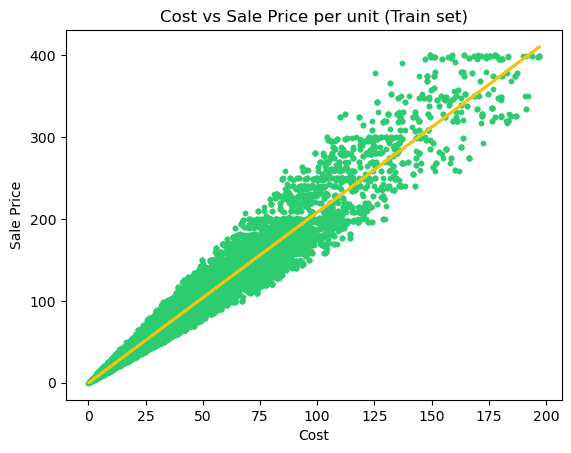

In [37]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='#2ecc71', s = 10)
plot_test.plot(X_test_2, y_predicted_2, color='#f1c40f', linewidth =2)
plot_test.title('Cost vs Sale Price per unit (Train set)')
plot_test.xlabel('Cost')
plot_test.ylabel('Sale Price')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression no outliers.png'), dpi=300, bbox_inches='tight')
plot_test.show()

In [54]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,48.000000,50.131868
1,14.500000,14.354789
2,25.000000,24.702739
3,199.500000,158.402882
4,44.990002,41.168253
5,78.459999,84.372375
6,11.990000,15.000872
7,25.480000,24.757023
8,9.250000,9.654344
9,13.500000,15.681716


### OBSERVATION: With some outliers out of the way, There isn't much difference in the prediction model.
### R2 has rather dropped a percentage to 95.7% meaning there is actually no need for removing the outliers to make the model more accurate.